In [16]:
import numpy as np
import pandas as pd
import chardet
import matplotlib.pyplot as plt

### Detect encoding

In [17]:
with open('Summer-Olympic-medals-1976-to-2008.csv', 'rb') as f:
    result = chardet.detect(f.read(1000))
    print(result)

{'encoding': 'ISO-8859-1', 'confidence': 0.73, 'language': ''}


### Read the CSV with the correct encoding

In [18]:
encoding = result['encoding']
summer_olympic_medals_file = pd.read_csv('Summer-Olympic-medals-1976-to-2008.csv', encoding=encoding)
summer_olympic_medals_file.head()

,City,Year,Sport,Discipline,Event,Athlete,Gender,Country_Code,Country,Event_gender,Medal
0,Montreal,1976.0,Aquatics,Diving,3m springboard,"KÖHLER, Christa",Women,GDR,East Germany,W,Silver
1,Montreal,1976.0,Aquatics,Diving,3m springboard,"KOSENKOV, Aleksandr",Men,URS,Soviet Union,M,Bronze
2,Montreal,1976.0,Aquatics,Diving,3m springboard,"BOGGS, Philip George",Men,USA,United States,M,Gold
3,Montreal,1976.0,Aquatics,Diving,3m springboard,"CAGNOTTO, Giorgio Franco",Men,ITA,Italy,M,Silver
4,Montreal,1976.0,Aquatics,Diving,10m platform,"WILSON, Deborah Keplar",Women,USA,United States,W,Bronze


### Drop rows where 'Year' is missing

In [19]:
summer_olympic_medals_file = summer_olympic_medals_file.dropna(subset='Year')

### Ensure 'Year' is an integer

In [20]:
summer_olympic_medals_file['Year'] = summer_olympic_medals_file['Year'].astype(int)

### Set 'Year' as the index and remove it from the columns

In [21]:
df = summer_olympic_medals_file.set_index('Year')
df.head()

,City,Sport,Discipline,Event,Athlete,Gender,Country_Code,Country,Event_gender,Medal
Year,,,,,,,,,,
1976,Montreal,Aquatics,Diving,3m springboard,"KÖHLER, Christa",Women,GDR,East Germany,W,Silver
1976,Montreal,Aquatics,Diving,3m springboard,"KOSENKOV, Aleksandr",Men,URS,Soviet Union,M,Bronze
1976,Montreal,Aquatics,Diving,3m springboard,"BOGGS, Philip George",Men,USA,United States,M,Gold
1976,Montreal,Aquatics,Diving,3m springboard,"CAGNOTTO, Giorgio Franco",Men,ITA,Italy,M,Silver
1976,Montreal,Aquatics,Diving,10m platform,"WILSON, Deborah Keplar",Women,USA,United States,W,Bronze


### Split the 'Athlete' column into 'First Name' and 'Last Name'

In [22]:
df[['Last Name', 'First Name']] = df['Athlete'].str.split(',', n=1, expand=True)
df = df.drop(columns=['Athlete'])
df

,City,Sport,Discipline,Event,Gender,Country_Code,Country,Event_gender,Medal,Last Name,First Name
Year,,,,,,,,,,,
1976,Montreal,Aquatics,Diving,3m springboard,Women,GDR,East Germany,W,Silver,KÖHLER,Christa
1976,Montreal,Aquatics,Diving,3m springboard,Men,URS,Soviet Union,M,Bronze,KOSENKOV,Aleksandr
1976,Montreal,Aquatics,Diving,3m springboard,Men,USA,United States,M,Gold,BOGGS,Philip George
1976,Montreal,Aquatics,Diving,3m springboard,Men,ITA,Italy,M,Silver,CAGNOTTO,Giorgio Franco
1976,Montreal,Aquatics,Diving,10m platform,Women,USA,United States,W,Bronze,WILSON,Deborah Keplar
...,...,...,...,...,...,...,...,...,...,...,...
2008,Beijing,Wrestling,Wrestling Gre-R,66 - 74kg,Men,FRA,France,M,Bronze,GUENOT,Christophe
2008,Beijing,Wrestling,Wrestling Gre-R,66 - 74kg,Men,GEO,Georgia,M,Gold,KVIRKELIA,Manuchar
2008,Beijing,Wrestling,Wrestling Gre-R,55 - 60kg,Men,AZE,Azerbaijan,M,Silver,RAHIMOV,Vitaliy


# Calculate the Country with the Most Medals per Year

In [23]:
medals_by_country = summer_olympic_medals_file.groupby(['Year', 'Country']).size().reset_index(name='Medal_Count')
top_countries_per_year = medals_by_country.loc[medals_by_country.groupby('Year')['Medal_Count'].idxmax()]
top_countries_per_year

,Year,Country,Medal_Count
30,1976,Soviet Union,285
67,1980,Soviet Union,442
119,1984,United States,333
164,1988,Soviet Union,294
239,1992,United States,224
315,1996,United States,260
394,2000,United States,248
469,2004,United States,264
554,2008,United States,315


# Calculate how many medals was won by gender per year

In [24]:
medals_by_gender = summer_olympic_medals_file.groupby(['Year', 'Gender']).size().reset_index(name='Medal_Count')
medals_by_gender_pivot = medals_by_gender.pivot(index='Year', columns='Gender', values='Medal_Count').fillna(0)
medals_by_gender_pivot

Gender,Men,Women
Year,,
1976,924,381
1980,958,429
1984,973,486
1988,1011,535
1992,1105,600
1996,1082,777
2000,1126,889
2004,1099,899
2008,1110,932


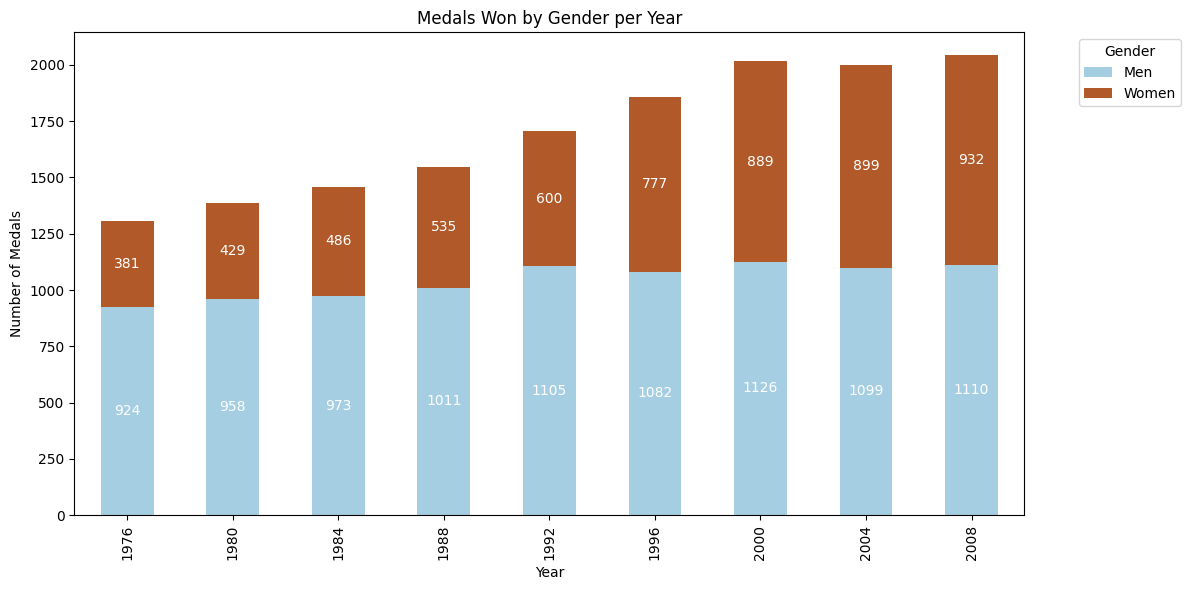

In [27]:

ax = medals_by_gender_pivot.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='Paired')

for bars in ax.containers:
    ax.bar_label(bars, label_type='center', fmt='%d', fontsize=10, color='white')

plt.title('Medals Won by Gender per Year')
plt.xlabel('Year')
plt.ylabel('Number of Medals')

plt.legend(title='Gender', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()

plt.show()
